<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Median value of owner-occupied homes

Text(0.5, 0, 'AGE')

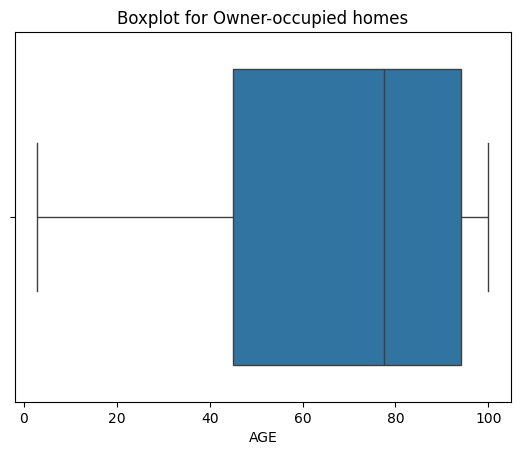

In [7]:
sns.boxplot(x = 'AGE', data = boston_df)

pyplot.title('Boxplot for Owner-occupied homes')
pyplot.xlabel('AGE')

#### conclusion - the median age of owner-sccupied homes is arround 80, with first Q1 grater then 40 and Q3 smaller then 100

### bar plot for the Charles river variable

<ipython-input-9-81cdf78518b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'CHAS', data = boston_df, palette = ['skyblue', 'lightcoral'])


Text(0.5, 1.0, 'count of charles river variable')

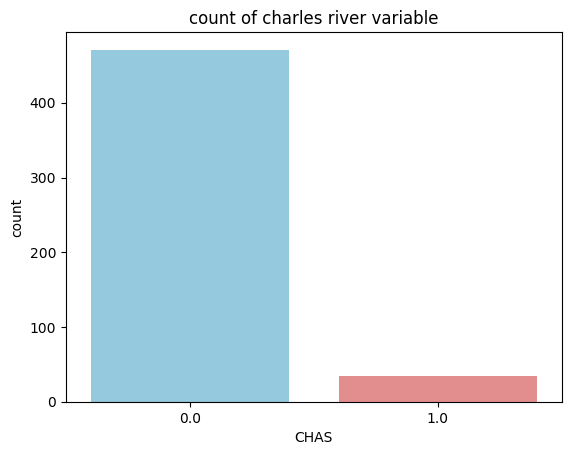

In [9]:
sns.countplot(x = 'CHAS', data = boston_df, palette = ['skyblue', 'lightcoral'])
pyplot.title('count of charles river variable')

#### conclusion - there are really less number of tract bounds river

### boxplot for the MEDV variable vs the AGE variable. 

<ipython-input-10-72c88e54f2c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='pastel')


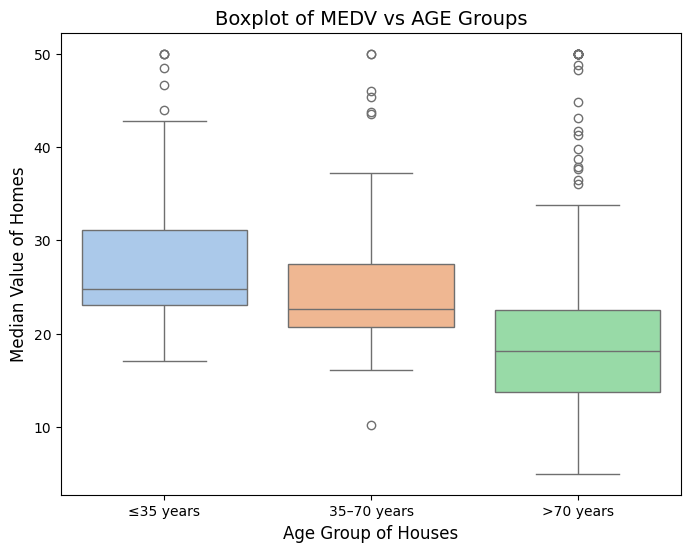

In [10]:
bins = [0, 35, 70, 100]  
labels = ['≤35 years', '35–70 years', '>70 years']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)


pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='pastel')


pyplot.title('Boxplot of MEDV vs AGE Groups', fontsize=14)
pyplot.xlabel('Age Group of Houses', fontsize=12)
pyplot.ylabel('Median Value of Homes', fontsize=12)


pyplot.show()

#### Conclusion - value of homes which are bought by younger people of age 35 and less have the hightest value as compaired to the other groups, and most cheapest homes are owned by people with age greater then 70 years

### Scatter plot for INDUS and NOX


Text(0, 0.5, 'proportion of non-retail business acres per town')

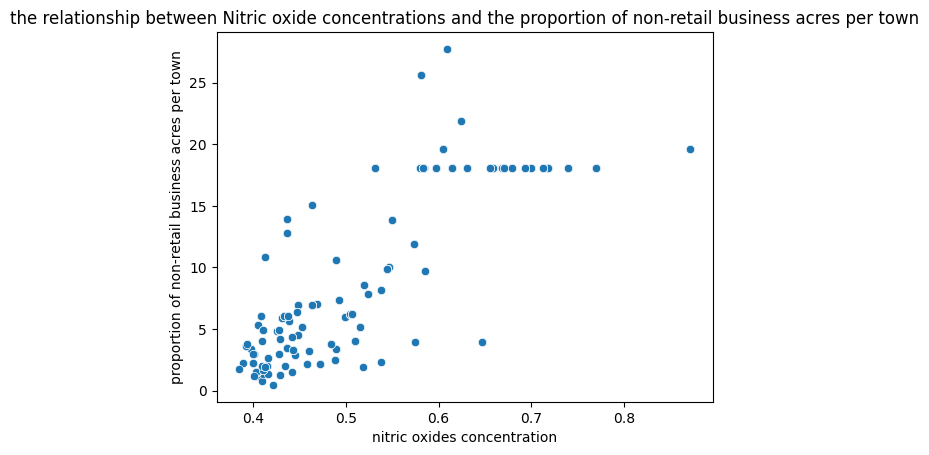

In [11]:
sns.scatterplot(data = boston_df, y = 'INDUS', x = 'NOX')
pyplot.title('the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('nitric oxides concentration')
pyplot.ylabel('proportion of non-retail business acres per town')

#### Conclusion - it shows a positive close to linear relationship in NOX and proportion of non-retail business acres per town, meaning if the NOX will increase it will also increase the propertion of non-retail business

### Histogram for pupil-teacher ratio

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio')

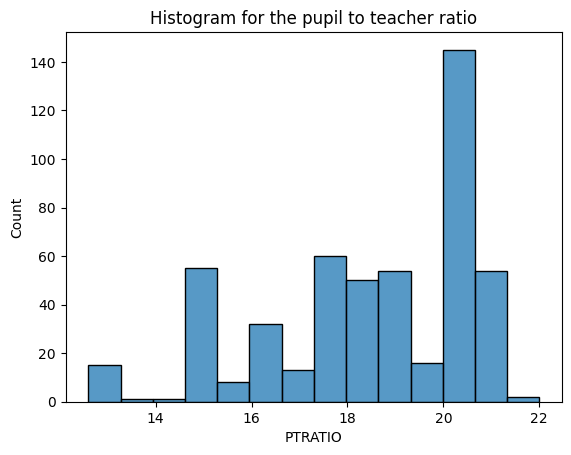

In [13]:
sns.histplot(x = 'PTRATIO', data = boston_df)
pyplot.title('Histogram for the pupil to teacher ratio')

#### conclusion - the is uneven distribution of pupil to teacher ration, ranging between close to 5 to 22, but most places have a close to 20 ration 

### 1. Any difference in median value of houses bounded by the Charles river or not? (T-test)

##### H_0 = no difference
##### H_1 = difference in MEDV for CHAS = 1,0

In [18]:
import scipy.stats
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### Conclusion - p value is smaller then 0.05, we reject null hypothesis 

###  2. Difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) using ANOVA


#### Null hypothesis (H₀): The mean (or median, since we’re using MEDV) house values are the same across all age groups.

#### Alternative hypothesis (H₁): At least one age group has a different mean house value.

In [39]:
boston_df.head(20)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35–70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>70 years
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35–70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35–70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35–70 years
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,35–70 years
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,35–70 years
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,>70 years
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,>70 years
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,>70 years


In [40]:
lower_threefive = boston_df[boston_df['AGE_Group'] == '≤35 years']['MEDV']
threefive_sevenzero = boston_df[boston_df['AGE_Group'] == '35–70 years']['MEDV']
uper_sevenzero = boston_df[boston_df['AGE_Group'] == '>70 years']['MEDV']

In [41]:
f_statistic, p_value = scipy.stats.f_oneway(lower_threefive, threefive_sevenzero, uper_sevenzero)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### conclusion - as P-value < alpha we reject NULL hypo

In [37]:
boston_df['AGE_Group'].value_counts()

AGE_Group
>70 years      287
35–70 years    128
≤35 years       91
Name: count, dtype: int64

### 3. Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#### null hypo = there is no effect, 
#### alternative hypo = there is effect

In [23]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Conclusion - since the p-value is smaller then 0.05, we reject the null hypothysis and there is relationship between NOX and INDUS

### 4. Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

#### Null hypothesis (H₀): β₁ = 0 (Distance has no effect on median house value)
#### Alternative (H₁): β₁ ≠ 0 (Distance affects median house value)

In [25]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        22:53:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p = 0.000 < α = 0.05, we reject H₀.